In [1]:
%cd ..

/


In [2]:
!nvcc -V
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [3]:
# Install torch dependencies: (use cu101 since colab has CUDA 10.1)
!pip install -U torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# Install mmcv-full thus we could use CUDA operators
!pip install mmcv-full>=1.3.8

# Install mmdetection
!pip install mmdet>=2.14.0

# Install mmocr
!git clone https://github.com/open-mmlab/mmocr.git
%cd mmocr
!pip install -r requirements.txt
!pip install -v -e .

# install Pillow 7.0.0 back in order to avoid bug in colab
!pip install Pillow==7.0.0

Looking in links: https://download.pytorch.org/whl/torch_stable.html
fatal: destination path 'mmocr' already exists and is not an empty directory.
/mmocr
Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/bin
sysconfig: /usr/bin
Value for scheme.data d

In [4]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(mmcv.__version__)
print(get_compiling_cuda_version())
print(get_compiler_version())

# Check mmocr installation
import mmocr
print(mmocr.__version__)

1.5.0+cu101 True
2.15.1
1.3.12
11.0
GCC 7.5
0.3.0


In [5]:
from mmocr.utils.ocr import MMOCR
mmocr = MMOCR(det='TextSnake', recog='SAR')
mmocr.readtext('/content/drive/MyDrive/WhatsApp Image 2021-08-15 at 5.55.03 PM.jpeg', print_result=True, output='outputs/demo_text_ocr_pred.jpg')

Use load_from_http loader


Downloading: "https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth" to /root/.cache/torch/checkpoints/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth


  0%|          | 0.00/139M [00:00<?, ?B/s]

Use load_from_http loader


Downloading: "https://download.openmmlab.com/mmocr/textrecog/sar/sar_r31_parallel_decoder_academic-dba3a4a3.pth" to /root/.cache/torch/checkpoints/sar_r31_parallel_decoder_academic-dba3a4a3.pth


  0%|          | 0.00/219M [00:00<?, ?B/s]

/mmocr/mmocr/apis/inference.py:48: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '
/usr/local/lib/python3.7/dist-packages/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


{'filename': 'WhatsApp Image 2021-08-15 at 5.55.03 PM', 'text': ['2nd', 'jockpetipe.front.belowed-belle', '8/202', 'www.SMotorchesters', 'are', 'company', '&Batch#', 'Vaccination', 'Dose', 'Person', 'skilletroison', 'ProductNamewith', 'LOT#', 'Date:', 'NameofSkilled', 'Vacheticing', 'Conventionalistic.', 'amerSecondosarcinalion', 'Distribution:', 'OfficialStampeimposed', 'Gender', 'MALE', 'Age', '207', 'NNTP-Posting-Host:', 'Full', 'USAMg', 'VaccinationCard.', 'PLEASIC', 'the', 'Gonermannentalitypeathenthenth', 'Orbit', 'Sender:', 'bhren--']}



[{'filename': 'WhatsApp Image 2021-08-15 at 5.55.03 PM',
  'text': ['2nd',
   'jockpetipe.front.belowed-belle',
   '8/202',
   'www.SMotorchesters',
   'are',
   'company',
   '&Batch#',
   'Vaccination',
   'Dose',
   'Person',
   'skilletroison',
   'ProductNamewith',
   'LOT#',
   'Date:',
   'NameofSkilled',
   'Vacheticing',
   'Conventionalistic.',
   'amerSecondosarcinalion',
   'Distribution:',
   'OfficialStampeimposed',
   'Gender',
   'MALE',
   'Age',
   '207',
   'NNTP-Posting-Host:',
   'Full',
   'USAMg',
   'VaccinationCard.',
   'PLEASIC',
   'the',
   'Gonermannentalitypeathenthenth',
   'Orbit',
   'Sender:',
   'bhren--']}]

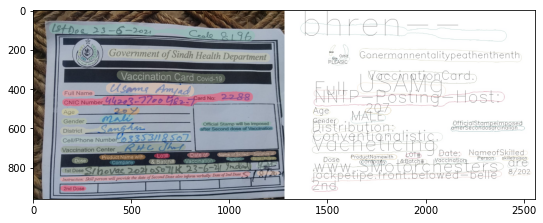

In [6]:
# Visualize the results
import matplotlib.pyplot as plt
predicted_img = mmcv.imread('./outputs/demo_text_ocr_pred.jpg')
plt.figure(figsize=(9, 16))
plt.imshow(mmcv.bgr2rgb(predicted_img))
plt.show()